# Credit Risk Analysis

Projeto desenvolvido por:
* Mariana Ramos - up201806869
* Pedro Ferreira - up201806506
* Pedro Ponte - up201809694

## Table of contents

1. [Introduction](#Introduction)

2. [Required Libraries](#Required-Libraries)

3. [The Problem Domain](#The-Problem-Domain)

4. [Step 1: Answering the question](#Step-1:-Answering-the-question)

5. [Step 2: Checking the data](#Step-2:-Checking-the-data)

## Introduction

[[ go back to the top ]](#Table-of-contents)

## Required libraries

[[ go back to the top ]](#Table-of-contents)

If you don't have Python on your computer, you can use the [Anaconda Python distribution](http://continuum.io/downloads) to install most of the Python packages you need. Anaconda provides a simple double-click installer for your convenience.

This notebook uses several Python packages that come standard with the Anaconda Python distribution. The primary libraries that we'll be using are:

* **NumPy**: Provides a fast numerical array structure and helper functions.
* **pandas**: Provides a DataFrame structure to store data in memory and work with it easily and efficiently.
* **scikit-learn**: The essential Machine Learning package in Python.
* **matplotlib**: Basic plotting library in Python; most other Python plotting libraries are built on top of it.
* **Seaborn**: Advanced statistical plotting library.

To make sure you have all of the packages you need, install them with `conda`:

    conda install numpy pandas scikit-learn matplotlib seaborn
    
    conda install -c conda-forge watermark

`conda` may ask you to update some of them if you don't have the most recent version. Allow it to do so.

## The Problem Domain

[[ go back to the top ]](#Table-of-contents)

## Step 1: Answering the question

[[ go back to the top ]](#Table-of-contents)

The first step to any data analysis project is to define the question or problem we're looking to solve, and to define a measure (or set of measures) for our success at solving that task. The data analysis checklist has us answer a handful of questions to accomplish that, so let's work through those questions.

>Did you specify the type of data analytic question (e.g. exploration, association causality) before touching the data?

We're trying to design a predictive model in order to evaluate the credit risk of a given loan and decide whether the loan should be granted or not.

>Did you define the metric for success before beginning?

Let's do that now. Since we're performing classification, we can use [accuracy](https://en.wikipedia.org/wiki/Accuracy_and_precision) — the fraction of correctly classified loans — to quantify how well our model is performing. The accuracy achieved should be, at least, 

>Did you understand the context for the question and the scientific or business application?

TODO

>Did you record the experimental design?

TODO

>Did you consider whether the question could be answered with the available data?

TODO

<hr />

## Step 2: Checking the data

[[ go back to the top ]](#Table-of-contents)

In order to be able to make conclusions and reach our goal, we will need to extract and study the data. To do so, we have to import the panda library and extract the information to be stored in a variable so we can work with it. 

In [101]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt

credit_data = pd.read_csv('data.csv', low_memory=False)

In [102]:
# data frame shape
print('Number of rows: ', credit_data.shape[0])
print('Number of columns: ', credit_data.shape[1])

Number of rows:  855969
Number of columns:  73


As we can see the data file has a total of 855969 different results and a total of 73 evaluation criteria. The second parameter of the read_csv function makes all the empty fields be filled with NA so we can easily analyse missing values in the future.

We can start by reading the data into a pandas DataFrame to see if is everything alright.

In [103]:
credit_data.head(10)

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
0,1077501,1296599,5000,5000,4975.0,36 months,10.65,162.87,B,B2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
1,1077430,1314167,2500,2500,2500.0,60 months,15.27,59.83,C,C4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
2,1077175,1313524,2400,2400,2400.0,36 months,15.96,84.33,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
3,1076863,1277178,10000,10000,10000.0,36 months,13.49,339.31,C,C1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
4,1075358,1311748,3000,3000,3000.0,60 months,12.69,67.79,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
5,1075269,1311441,5000,5000,5000.0,36 months,7.90,156.46,A,A4,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
6,1069639,1304742,7000,7000,7000.0,60 months,15.96,170.08,C,C5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
7,1072053,1288686,3000,3000,3000.0,36 months,18.64,109.43,E,E1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0
8,1071795,1306957,5600,5600,5600.0,60 months,21.28,152.39,F,F2,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,1071570,1306721,5375,5375,5350.0,60 months,12.69,121.45,B,B5,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1


In [104]:
credit_data.tail()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
855964,36371250,39102635,10000,10000,10000.0,36 months,11.99,332.10,B,B5,...,NaN,NaN,NaN,NaN,NaN,17100.0,NaN,NaN,NaN,0
855965,36441262,39152692,24000,24000,24000.0,36 months,11.99,797.03,B,B5,...,NaN,NaN,NaN,NaN,NaN,10200.0,NaN,NaN,NaN,0
855966,36271333,38982739,13000,13000,13000.0,60 months,15.99,316.07,D,D2,...,NaN,NaN,NaN,NaN,NaN,18000.0,NaN,NaN,NaN,0
855967,36490806,39222577,12000,12000,12000.0,60 months,19.99,317.86,E,E3,...,NaN,NaN,NaN,NaN,NaN,27000.0,NaN,NaN,NaN,0
855968,36271262,38982659,20000,20000,20000.0,36 months,11.99,664.20,B,B5,...,NaN,NaN,NaN,NaN,NaN,41700.0,NaN,NaN,NaN,0


In [105]:
credit_data.describe()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,installment,annual_inc,dti,delinq_2yrs,...,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,default_ind
count,8.559690e+05,8.559690e+05,855969.000000,855969.000000,855969.000000,855969.000000,855969.000000,8.559690e+05,855969.000000,855969.000000,...,11609.000000,13288.000000,13288.000000,13288.000000,13288.000000,7.886560e+05,13288.000000,13288.000000,13288.000000,855969.000000
mean,3.224073e+07,3.476269e+07,14745.571335,14732.378305,14700.061226,13.192320,436.238072,7.507119e+04,18.122165,0.311621,...,71.486993,1.354305,2.945515,5840.443332,61.024526,3.216357e+04,0.947772,1.524232,1.841963,0.054286
std,2.271969e+07,2.399418e+07,8425.340005,8419.471653,8425.805478,4.368365,243.726876,6.426447e+04,17.423629,0.857189,...,23.015293,1.483710,2.595313,5108.500262,20.018117,3.769964e+04,1.441667,2.697601,2.975049,0.226581
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,5.320000,15.690000,0.000000e+00,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,-4.000000,0.000000
25%,9.067986e+06,1.079273e+07,8000.000000,8000.000000,8000.000000,9.990000,260.550000,4.500000e+04,11.880000,0.000000,...,58.500000,0.000000,1.000000,2405.000000,47.900000,1.400000e+04,0.000000,0.000000,0.000000,0.000000
50%,3.431355e+07,3.697532e+07,13000.000000,13000.000000,13000.000000,12.990000,382.550000,6.500000e+04,17.610000,0.000000,...,75.000000,1.000000,2.000000,4485.500000,62.100000,2.380000e+04,0.000000,0.000000,2.000000,0.000000
75%,5.446311e+07,5.803559e+07,20000.000000,20000.000000,20000.000000,15.990000,571.560000,9.000000e+04,23.900000,0.000000,...,87.500000,2.000000,4.000000,7701.250000,75.300000,3.990000e+04,1.000000,2.000000,3.000000,0.000000
max,6.861687e+07,7.351969e+07,35000.000000,35000.000000,35000.000000,28.990000,1445.460000,9.500000e+06,9999.000000,39.000000,...,223.300000,22.000000,43.000000,83047.000000,151.400000,9.999999e+06,15.000000,33.000000,32.000000,1.000000


Let's examine the structure of the data set.

In [106]:
# all data frame columns
credit_data.columns

Index(['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv',
       'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'issue_d', 'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code',
       'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line',
       'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record',
       'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc',
       'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
       'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint',
       'verification_status_joint', 'acc_now_delinq', 'tot_col

In [107]:
# data frame summary
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 855969 entries, 0 to 855968
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   id                           855969 non-null  int64  
 1   member_id                    855969 non-null  int64  
 2   loan_amnt                    855969 non-null  int64  
 3   funded_amnt                  855969 non-null  int64  
 4   funded_amnt_inv              855969 non-null  float64
 5   term                         855969 non-null  object 
 6   int_rate                     855969 non-null  float64
 7   installment                  855969 non-null  float64
 8   grade                        855969 non-null  object 
 9   sub_grade                    855969 non-null  object 
 10  emp_title                    806526 non-null  object 
 11  emp_length                   812908 non-null  object 
 12  home_ownership               855969 non-null  object 
 13 

We can see that some features have missing values. Let's take a closer look at them.

In [108]:
# percentage of missing values per feature
print((credit_data.isnull().sum() * 100 / credit_data.shape[0]).sort_values(ascending=False))

verification_status_joint    99.948363
annual_inc_joint             99.948363
dti_joint                    99.948363
il_util                      98.643759
mths_since_rcnt_il           98.488964
                               ...    
pub_rec                       0.000000
open_acc                      0.000000
inq_last_6mths                0.000000
earliest_cr_line              0.000000
id                            0.000000
Length: 73, dtype: float64


Looking to all features and the respective percentage of missing values, we can conclude that some of them (like *verification_status_joint*, *annual_inc_joint*, *dti_joint*, *il_util*, *mths_since_rcnt_il*, *total_bal_il*, *inq_last_12m*, *open_acc_6m*, *open_il_6m*, *open_il_24m*, *open_il_12m*, *open_rv_12m*, *open_rv_24m*, *max_bal_bc*, *all_util*, *inq_fi*, *total_cu_tl* have almost all entries missing. As this feature is not crucial for the project, we are dropping it. 

In [109]:
# drop the columns
credit_data.drop(['verification_status_joint', 'annual_inc_joint', 'dti_joint', 'il_util', 'mths_since_rcnt_il',
                   'total_bal_il', 'inq_last_12m', 'open_acc_6m', 'open_il_6m', 'open_il_24m', 'open_il_12m', 'open_rv_12m',
                   'open_rv_24m', 'max_bal_bc', 'all_util', 'inq_fi', 'total_cu_tl'], axis=1, inplace=True)

Now, let's examine the number of unique values for each feature.

In [110]:
# number of unique observations per column
credit_data.nunique().sort_values()

policy_code                         1
default_ind                         2
application_type                    2
term                                2
pymnt_plan                          2
initial_list_status                 2
next_pymnt_d                        3
verification_status                 3
home_ownership                      6
grade                               7
acc_now_delinq                      8
inq_last_6mths                      9
emp_length                         11
collections_12_mths_ex_med         12
purpose                            14
delinq_2yrs                        29
pub_rec                            31
sub_grade                          35
addr_state                         51
open_acc                           77
last_pymnt_d                       97
last_credit_pull_d                102
issue_d                           103
mths_since_last_record            123
total_acc                         134
mths_since_last_delinq            155
mths_since_l

The feature *policy_code* only has one value, so we can conclude that this one is not important for our analysis and we can also drop this collumn.

In [111]:
# drop the column "policy_code"
credit_data.drop('policy_code', axis=1, inplace=True)

*id* and *member_id* features are randomly generated fields by bank for unique identification purposes only, so we can drop them.

In [112]:
# drop the columns "id" and "member_id"
credit_data.drop(['id', 'member_id'], axis=1, inplace=True)

Features like *funded_amnt*, *funded_amnt_inv*, *mths_since_last_record*, *out_prncp*, *out_prncp_inv*, *total_pymnt*, *total_pymnt_inv*, *total_rec_prncp*, *total_rec_int*, *total_rec_late_fee*, *recoveries*, *collection_recovery_fee*, *last_pymnt_d*, *last_pymnt_amnt*, *next_pymnt_d* can be dropped because they leak data from future, after the loan has already started to be funded. 

In [113]:
# drop columns
credit_data.drop(['funded_amnt', 'funded_amnt_inv', 'mths_since_last_record', 'out_prncp', 'out_prncp_inv', 'total_pymnt',
                   'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 
                   'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d'], axis=1, inplace=True)

*emp_title* feature requires other data and a lot of processing to become potentially useful, so we opt to drop that one too.

In [114]:
# drop "emp_title" column
credit_data.drop('emp_title', axis=1, inplace=True)

Also *desc*, *initial_list_status*, *total_rev_hi_lim* features doesn't add value to our model, so we will drop them.

In [115]:
# drop "desc", "initial_list_status", "total_rev_hi_lim" columns
credit_data.drop(['desc', 'initial_list_status', 'total_rev_hi_lim'], axis=1, inplace=True)

*zip_code* feature is mostly redundant since only the first 3 digits of the 5 digit zip code are visible.

In [116]:
# drop "zip_code" column
credit_data.drop('zip_code', axis=1, inplace=True)

*addr_state* collumn seems like to contain categorical values. Let's explore the unique value counts of this column.

In [117]:
print(credit_data['addr_state'].value_counts())

CA    125172
NY     71114
TX     68708
FL     58639
IL     34379
NJ     32061
PA     30250
OH     28651
GA     28043
VA     25234
NC     23787
MI     22175
MD     20209
MA     19835
AZ     19693
WA     18816
CO     18211
MN     15424
MO     13743
IN     13348
CT     13042
TN     12392
NV     11972
WI     11199
AL     10732
OR     10562
SC     10302
LA     10186
KY      8299
OK      7759
KS      7693
AR      6399
UT      6055
NM      4757
HI      4380
WV      4247
NH      4156
RI      3753
MS      3653
MT      2466
DE      2402
DC      2382
AK      2134
WY      1974
VT      1753
SD      1745
NE      1124
ME       491
ND       452
ID         9
IA         7
Name: addr_state, dtype: int64


The *addr_state* column contains too many unique values, so it’s better to drop this.

In [118]:
# drop "addr_state" column
credit_data.drop('addr_state', axis=1, inplace=True)

Let's look at *pymnt_plan* feature values.

In [119]:
print(credit_data['pymnt_plan'].value_counts())

n    855964
y         5
Name: pymnt_plan, dtype: int64


It seems that this column has two unique values, *y* and *n*, with *y* occurring only 5 times. Let’s drop this column:

In [120]:
# drop "pymnt_plan" column
credit_data.drop('pymnt_plan', axis=1, inplace=True)

Let's also look at *application_type* column.

In [121]:
print(credit_data['application_type'].value_counts())

INDIVIDUAL    855527
JOINT            442
Name: application_type, dtype: int64


It seems that this column only has two unique values, *INDIVIDUAL* and *JOINT*, with *JOINT* occurring only 442 times. Let's drop this column too:

In [122]:
# drop "application_type" column
credit_data.drop('application_type', axis=1, inplace=True)

Next, let’s look at the unique value counts for the *purpose* and *title* columns to understand which columns we want to keep.

In [123]:
for name in ['purpose','title']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: purpose

debt_consolidation    505392
credit_card           200144
home_improvement       49956
other                  40949
major_purchase         16587
small_business          9785
car                     8593
medical                 8193
moving                  5160
vacation                4542
house                   3513
wedding                 2280
renewable_energy         549
educational              326
Name: purpose, dtype: int64 

Unique Values in column: title

Debt consolidation           398089
Credit card refinancing      159228
Home improvement              38633
Other                         30522
Debt Consolidation            15469
                              ...  
Web for Creative Kids             1
Paying Off 3 Credit Cards         1
LASTCALL4ME2                      1
homeimprovementloan               1
Payback $                         1
Name: title, Length: 60954, dtype: int64 



It appears the *purpose* and *title* columns do contain overlapping information. *title* column contains too many different values with distinct information, so it is hard to analyse its values. On the other hand, *purpose* has many unique values and they are nominal so, to convert them to numerical in order to analyse them will create many new collumns and difficult our job.
Taking this into account, we opt to drop both columns.

In [124]:
# drop "title" and "purpose" column
credit_data.drop(['title', 'purpose'], axis=1, inplace=True)

Looking at the features that we still have, we see that we have two that are very similar: *grade* and *sub_grade*.

In [125]:
for name in ['grade','sub_grade']:
    print("Unique Values in column: {}\n".format(name))
    print(credit_data[name].value_counts(),'\n')

Unique Values in column: grade

B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

Unique Values in column: sub_grade

B3    54958
B4    54116
C1    51588
C2    50457
C3    48337
B2    47589
B5    47333
C4    46941
B1    44002
A5    43957
C5    39532
D1    34667
A4    33991
D2    28385
D3    25289
D4    24253
A3    23095
A1    22516
A2    22106
D5    20208
E1    17230
E2    15994
E3    13294
E4    11011
E5     8919
F1     6702
F2     4979
F3     4099
F4     3168
F5     2380
G1     1698
G2     1259
G3      877
G4      570
G5      469
Name: sub_grade, dtype: int64 



We can conclude that *sub_grade* contains redundant information that is already in the *grade* column, so we can also drop this column.

In [126]:
# drop "sub_grade" column
credit_data.drop('sub_grade', axis=1, inplace=True)

In [127]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                           0
term                                0
int_rate                            0
installment                         0
grade                               0
emp_length                      43061
home_ownership                      0
annual_inc                          0
verification_status                 0
issue_d                             0
dti                                 0
delinq_2yrs                         0
earliest_cr_line                    0
inq_last_6mths                      0
mths_since_last_delinq         439812
open_acc                            0
pub_rec                             0
revol_bal                           0
revol_util                        446
total_acc                           0
last_credit_pull_d                 50
collections_12_mths_ex_med         56
mths_since_last_major_derog    642830
acc_now_delinq                      0
tot_coll_amt                    67313
tot_cur_bal 

*mths_since_last_major_derog* column has to many null values, in the order of 75%, so we will drop this one to. We also drop *mths_since_last_delinq* column as it has a high  percentage of null valuess too, in order of 50%.

In [128]:
# drop "mths_since_last_major_derog" and "mths_since_last_delinq" columns
credit_data.drop(['mths_since_last_major_derog', 'mths_since_last_delinq'], axis=1, inplace=True)

Let's now investigate columns that are of the **object** data type and figure out how we can make those values numeric.

In [129]:
object_columns_df = credit_data.select_dtypes(include=['object'])
print(object_columns_df.iloc[0])

term                    36 months
grade                           B
emp_length              10+ years
home_ownership               RENT
verification_status      Verified
issue_d                01-12-2011
earliest_cr_line       01-01-1985
last_credit_pull_d     01-01-2016
Name: 0, dtype: object


These columns seem to represent categorical values:
    * term
    * grade
    * emp_length
    * home_ownership
    * verification_status
    * earliest_cr_line
    * last_credit_pull_d
    * issue_data

Let's now explore the other categorical columns.

In [130]:
cols = ['term', 'grade', 'emp_length', 'home_ownership', 'verification_status']
for name in cols:
    print(name,':')
    print(credit_data[name].value_counts(),'\n')

term :
 36 months    600221
 60 months    255748
Name: term, dtype: int64 

grade :
B    247998
C    236855
A    145665
D    132802
E     66448
F     21328
G      4873
Name: grade, dtype: int64 

emp_length :
10+ years    282090
2 years       75986
< 1 year      67597
3 years       67392
1 year        54855
5 years       53812
4 years       50643
7 years       43204
8 years       42421
6 years       41446
9 years       33462
Name: emp_length, dtype: int64 

home_ownership :
MORTGAGE    429106
RENT        342535
OWN          84136
OTHER          144
NONE            45
ANY              3
Name: home_ownership, dtype: int64 

verification_status :
Source Verified    318178
Verified           280049
Not Verified       257742
Name: verification_status, dtype: int64 



*grade*, *emp_length* and *term* columns contain ordinal values, i.e. they are in natural order and we can sort or order them either in increasing or decreasing order. For this reason, we can change the values of this columns to the appropriate numeric values.

In [131]:
# strip months from 'term' and make it an int
credit_data['term'] = credit_data['term'].str.split(' ').str[1]


mapping_dict = {
    "emp_length": {
        "10+ years": 10,
        "9 years": 9,
        "8 years": 8,
        "7 years": 7,
        "6 years": 6,
        "5 years": 5,
        "4 years": 4,
        "3 years": 3,
        "2 years": 2,
        "1 year": 1,
        "< 1 year": 0,
        "n/a": 0
    },
    "grade": {
        "A": 1,
        "B": 2,
        "C": 3,
        "D": 4,
        "E": 5,
        "F": 6,
        "G": 7
    },
    "term": {
        "36": 36.0,
        "60": 60.0
    }
}
credit_data = credit_data.replace(mapping_dict)

In [132]:
credit_data[['emp_length', 'grade', 'term']].head(10)

,emp_length,grade,term
0,10.0,2,36.0
1,0.0,3,60.0
2,10.0,3,36.0
3,10.0,3,36.0
4,1.0,2,60.0
5,3.0,1,36.0
6,8.0,3,60.0
7,9.0,5,36.0
8,4.0,6,60.0
9,0.0,2,60.0


*verification_status* and *home_ownership* features contain nominal values, so we can't order them. In this case, we will have to convert them to numerical values using dummy variables.

In [133]:
# Converting nominal features into numerical features by encoding them as dummy variables
nominal_columns = ["verification_status", "home_ownership"]
dummy_loan = pd.get_dummies(credit_data[nominal_columns])
print(dummy_loan.head())

   verification_status_Not Verified  verification_status_Source Verified  \
0                                 0                                    0   
1                                 0                                    1   
2                                 1                                    0   
3                                 0                                    1   
4                                 0                                    1   

   verification_status_Verified  home_ownership_ANY  home_ownership_MORTGAGE  \
0                             1                   0                        0   
1                             0                   0                        0   
2                             0                   0                        0   
3                             0                   0                        0   
4                             0                   0                        0   

   home_ownership_NONE  home_ownership_OTHER  home_ownership_O

In [134]:
# Insert the dummy variables into the original DataFrame, drop nominal columns
credit_data = pd.concat([credit_data, dummy_loan], axis=1)
credit_data = credit_data.drop(nominal_columns, axis=1)

In [135]:
credit_data.head()

,loan_amnt,term,int_rate,installment,grade,emp_length,annual_inc,issue_d,dti,delinq_2yrs,...,default_ind,verification_status_Not Verified,verification_status_Source Verified,verification_status_Verified,home_ownership_ANY,home_ownership_MORTGAGE,home_ownership_NONE,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT
0,5000,36.0,10.65,162.87,2,10.0,24000.0,01-12-2011,27.65,0,...,0,0,0,1,0,0,0,0,0,1
1,2500,60.0,15.27,59.83,3,0.0,30000.0,01-12-2011,1.00,0,...,1,0,1,0,0,0,0,0,0,1
2,2400,36.0,15.96,84.33,3,10.0,12252.0,01-12-2011,8.72,0,...,0,1,0,0,0,0,0,0,0,1
3,10000,36.0,13.49,339.31,3,10.0,49200.0,01-12-2011,20.00,0,...,0,0,1,0,0,0,0,0,0,1
4,3000,60.0,12.69,67.79,2,1.0,80000.0,01-12-2011,17.94,0,...,0,0,1,0,0,0,0,0,0,1


*earliest_cr_line*, *issue_d*, *last_credit_pull_d* columns contain date values. Let's convert them:

In [136]:
# Convert date inputs
cols = ["earliest_cr_line","issue_d","last_credit_pull_d"]
for col in cols:
    credit_data[col] = pd.to_datetime(credit_data[col],format="%d-%m-%Y")
credit_data[cols].head()

,earliest_cr_line,issue_d,last_credit_pull_d
0,1985-01-01,2011-12-01,2016-01-01
1,1999-04-01,2011-12-01,2013-09-01
2,2001-11-01,2011-12-01,2016-01-01
3,1996-02-01,2011-12-01,2015-01-01
4,1996-01-01,2011-12-01,2016-01-01


Let's now check if still exist columns with null values.

In [137]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                                  0
term                                       0
int_rate                                   0
installment                                0
grade                                      0
emp_length                             43061
annual_inc                                 0
issue_d                                    0
dti                                        0
delinq_2yrs                                0
earliest_cr_line                           0
inq_last_6mths                             0
open_acc                                   0
pub_rec                                    0
revol_bal                                  0
revol_util                               446
total_acc                                  0
last_credit_pull_d                        50
collections_12_mths_ex_med                56
acc_now_delinq                             0
tot_coll_amt                           67313
tot_cur_bal      

As there are some missing values, let's deal with them.

In [138]:
# Fill in the missing values for 'revol_util' with the median 'revol_util'.
credit_data.revol_util.fillna(credit_data.revol_util.median(), inplace=True)

# Fill in the missing values for 'collections_12_mths_ex_med' with the median 'collections_12_mths_ex_med'.
credit_data.collections_12_mths_ex_med.fillna(credit_data.collections_12_mths_ex_med.median(), inplace=True)

# Fill in the missing values for 'tot_coll_amt' with the median 'tot_coll_amt'.
credit_data.tot_coll_amt.fillna(credit_data.tot_coll_amt.median(), inplace=True)

# Fill in the missing values for 'tot_cur_bal' with the median 'tot_cur_bal'.
credit_data.tot_cur_bal.fillna(credit_data.tot_cur_bal.median(), inplace=True)

# Fill in the missing values for 'emp_length' with the 0.
credit_data.emp_length.fillna(0, inplace=True)

In [139]:
null_counts = credit_data.isnull().sum()
print("Number of null values in each column:\n{}".format(null_counts))

Number of null values in each column:
loan_amnt                               0
term                                    0
int_rate                                0
installment                             0
grade                                   0
emp_length                              0
annual_inc                              0
issue_d                                 0
dti                                     0
delinq_2yrs                             0
earliest_cr_line                        0
inq_last_6mths                          0
open_acc                                0
pub_rec                                 0
revol_bal                               0
revol_util                              0
total_acc                               0
last_credit_pull_d                     50
collections_12_mths_ex_med              0
acc_now_delinq                          0
tot_coll_amt                            0
tot_cur_bal                             0
default_ind                           

In [140]:
# Drop rows with missing values
credit_data = credit_data.dropna()
print(credit_data.isnull().sum().sort_values(ascending=False))

home_ownership_RENT                    0
home_ownership_OWN                     0
term                                   0
int_rate                               0
installment                            0
grade                                  0
emp_length                             0
annual_inc                             0
issue_d                                0
dti                                    0
delinq_2yrs                            0
earliest_cr_line                       0
inq_last_6mths                         0
open_acc                               0
pub_rec                                0
revol_bal                              0
revol_util                             0
total_acc                              0
last_credit_pull_d                     0
collections_12_mths_ex_med             0
acc_now_delinq                         0
tot_coll_amt                           0
tot_cur_bal                            0
default_ind                            0
verification_sta

In [141]:
credit_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 855919 entries, 0 to 855968
Data columns (total 32 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   loan_amnt                            855919 non-null  int64         
 1   term                                 855919 non-null  float64       
 2   int_rate                             855919 non-null  float64       
 3   installment                          855919 non-null  float64       
 4   grade                                855919 non-null  int64         
 5   emp_length                           855919 non-null  float64       
 6   annual_inc                           855919 non-null  float64       
 7   issue_d                              855919 non-null  datetime64[ns]
 8   dti                                  855919 non-null  float64       
 9   delinq_2yrs                          855919 non-null  int64         
 

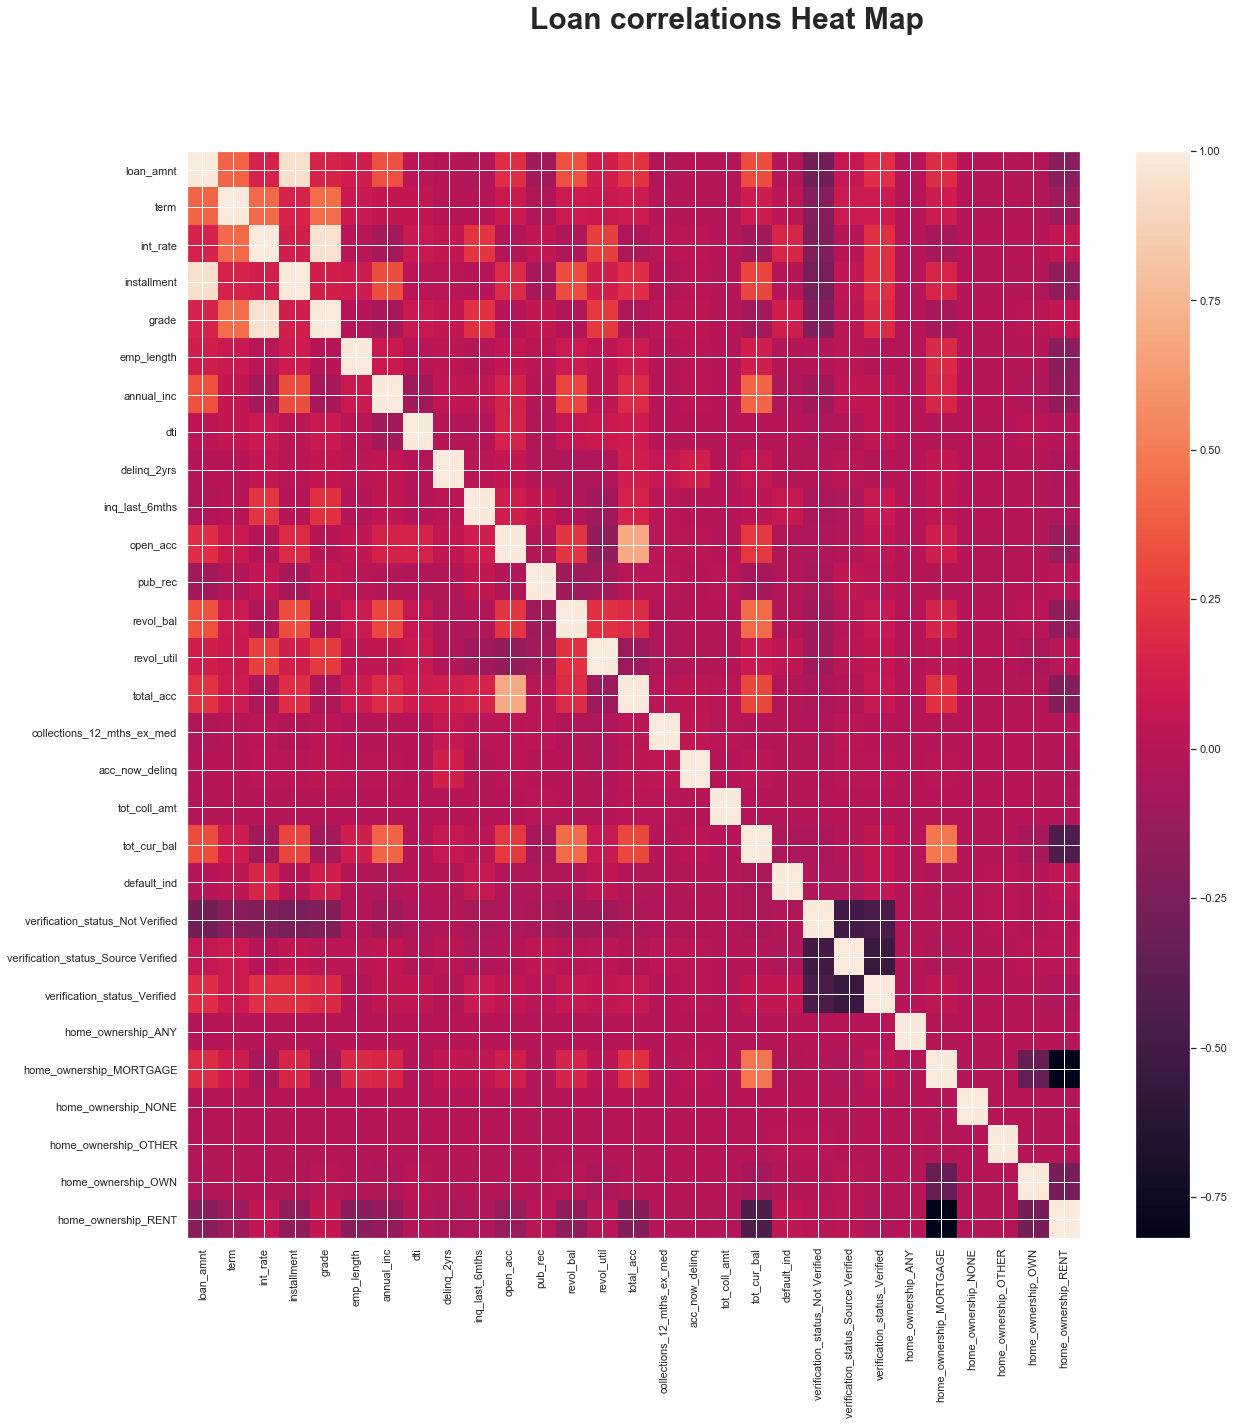

In [142]:
# Heatmap on the correlations between features in the loan data
credit_correlations = credit_data.corr()
plt.figure(figsize=(20, 20,))
plt.imshow(credit_correlations, cmap=None, interpolation='none', aspect='auto')
plt.colorbar()
plt.xticks(range(len(credit_correlations)), credit_correlations.columns, rotation='vertical')
plt.yticks(range(len(credit_correlations)), credit_correlations.columns);
plt.suptitle('Loan correlations Heat Map', fontsize=30, fontweight='bold')
plt.show()

Data preparation is finished and we can now start to apply machine learning algorithms in order to predict the credit risk.

It's usually better to visualize the data in some way. Visualization makes outliers and errors immediately stand out, whereas they might go unnoticed in a large table of numbers.
As the dataset contains to many rows, first we need to get a subset of the original dataset in order to be possiblle to apply the supervised learning algorithms to test our model.

In [143]:
# get a subset of the original dataset (first 50000 rows)
#credit_data_subset = credit_data[1:50001]
#credit_data_subset.info()

In [144]:
#from sklearn.neighbors import KNeighborsClassifier

#sb.pairplot(credit_data_subset, hue='default_ind')

To advance to the data analysis we need to gather the test and the train samples. To do so we will import the function train_test_split from sklearn and use it on thecredit_data data.

In [183]:
from sklearn import neighbors, datasets, preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X, y = credit_data[credit_data.columns.drop(['default_ind', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])], credit_data['default_ind']
    
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size=0.005, random_state=1)

X_test.head(10)

loan_amnt  term  int_rate  installment  grade  emp_length  annual_inc  \
787611      26000  36.0      6.39       795.58      1         0.0     54636.0   
310278       8000  36.0     12.49       267.60      2         3.0     40000.0   
670837      11200  60.0      9.99       237.92      2         4.0     72000.0   
141069      18000  60.0     10.16       383.87      2         4.0    101000.0   
606074       8000  36.0     15.61       279.72      4         7.0     24000.0   
404604       5950  36.0     18.25       215.86      4         3.0     45000.0   
694050      14000  60.0     17.57       352.25      4        10.0     50394.5   
508691      30000  36.0     11.49       989.14      2        10.0     75000.0   
749286      16800  36.0      9.99       542.01      2         2.0    140000.0   
359360      12000  36.0     10.99       392.81      2        10.0    104101.0   

          dti  delinq_2yrs  inq_last_6mths  ...  tot_cur_bal  \
787611  19.90            0               0  ...      60722.0   
310278  15.66            0               0  ...     218842.0   
670837  12.03            0               0  ...      16947.0   
141069  13.09            0               0  ...     557233.0   
606074  22.80            0               0  ...       8320.0   
404604  18.99            1               1  ...     246016.0   
694050  24.86            0               0  ...      41703.0   
508691  22.70            0               0  ...      57056.0   
749286  22.35            1               0  ...     319766.0   
359360  18.31            3               0  ...     641278.0   

        verification_status_Not Verified  verification_status_Source Verified  \
787611                                 0                                    0   
310278                                 1                                    0   
670837                                 0                                    1   
141069                                 0                                    0   
606074                                 0                                    1   
404604                                 0                                    1   
694050                                 0                                    0   
508691                                 0                                    0   
749286                                 0                                    1   
359360                                 0                                    1   

        verification_status_Verified  home_ownership_ANY  \
787611                             1                   0   
310278                             0                   0   
670837                             0                   0   
141069                             1                   0   
606074                             0                   0   
404604                             0                   0   
694050                             1                   0   
508691                             1                   0   
749286                             0                   0   
359360                             0                   0   

        home_ownership_MORTGAGE  home_ownership_NONE  home_ownership_OTHER  \
787611                        1                    0                     0   
310278                        0                    0                     0   
670837                        0                    0                     0   
141069                        1                    0                     0   
606074                        0                    0                     0   
404604                        1                    0                     0   
694050                        0                    0                     0   
508691                        0                    0                     0   
749286                        1                    0                     0   
359360                        1                    0                     0   


This way, the test sample will have results with a size corresponding to 1% of the total data.

In [146]:
X_train.info()
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42795 entries, 546983 to 413202
Data columns (total 28 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   loan_amnt                            42795 non-null  int64  
 1   term                                 42795 non-null  float64
 2   int_rate                             42795 non-null  float64
 3   installment                          42795 non-null  float64
 4   grade                                42795 non-null  int64  
 5   emp_length                           42795 non-null  float64
 6   annual_inc                           42795 non-null  float64
 7   dti                                  42795 non-null  float64
 8   delinq_2yrs                          42795 non-null  int64  
 9   inq_last_6mths                       42795 non-null  int64  
 10  open_acc                             42795 non-null  int64  
 11  pub_rec               

In [147]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.8983644859813084

We have achieved an accuracy of 89%. But let's see how this accuracy varies depending on how our training and testing set was sampled.

''

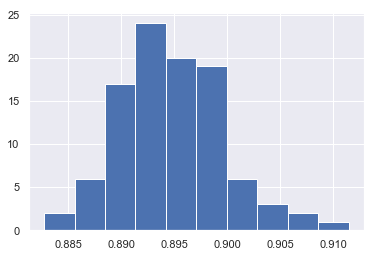

In [148]:
model_accuracies = []

for repetition in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size=0.005)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(X_train, y_train)
    classifier_accuracy = decision_tree_classifier.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

In [149]:
print("Min: ", min(model_accuracies))
print("Max: ", max(model_accuracies))

Min:  0.8827102803738318
Max:  0.9114485981308411


In [150]:
X, y = credit_data[credit_data.columns.drop(['grade', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])], credit_data['grade']
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size=0.005, random_state=1)

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier()

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, y_train)

# Validate the classifier on the testing set using classification accuracy
decision_tree_classifier.score(X_test, y_test)

0.9373831775700935

''

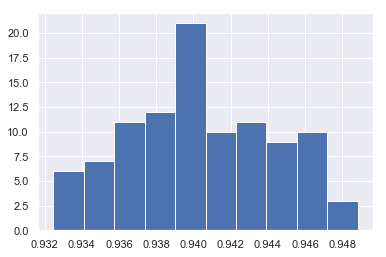

In [151]:
model_accuracies = []

for repetition in range(100):
    X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.05, test_size=0.005)
    
    decision_tree_classifier = DecisionTreeClassifier()
    decision_tree_classifier.fit(X_train, y_train)
    classifier_accuracy = decision_tree_classifier.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)
    
plt.hist(model_accuracies)
;

In [152]:
print("Min: ", min(model_accuracies))
print("Max: ", max(model_accuracies))

Min:  0.9324766355140187
Max:  0.9488317757009346


Another algorithm that can be used to predict the results is the Neuronal Networks (ANN).

In [153]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

In [154]:
credit_data_subset = credit_data.sample(frac=0.10)
X = credit_data_subset[credit_data_subset.columns.drop(['grade', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])] 
y = credit_data_subset['grade']

In [187]:
# get a test dataset with 10% of the credit_data_subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)

# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Best score: 0.9451701111471446
Best parameters: {'max_depth': 1, 'max_features': 1}


In [156]:
# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

# Train the classifier on the training set
ANNClassifier.fit(X_train, y_train)

MLPClassifier(max_iter=500, random_state=1)

In [157]:
predictions = ANNClassifier.predict(X_test)

confusion_matrix_ann = confusion_matrix(y_test,predictions)
print(confusion_matrix_ann)

[[2725  247    0    1    1    0    0]
 [ 325 3962  630    0    0    0    0]
 [   1  240 4061  356    0    0    0]
 [   0    1  244 2211  227    0    0]
 [   0    0    5  276 1037   80    1]
 [   0    0    0    6   62  311   18]
 [   0    0    0    1    3   34   53]]


In [158]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.89      0.92      0.90      2974
           2       0.89      0.81      0.85      4917
           3       0.82      0.87      0.85      4658
           4       0.78      0.82      0.80      2683
           5       0.78      0.74      0.76      1399
           6       0.73      0.78      0.76       397
           7       0.74      0.58      0.65        91

    accuracy                           0.84     17119
   macro avg       0.80      0.79      0.79     17119
weighted avg       0.84      0.84      0.84     17119



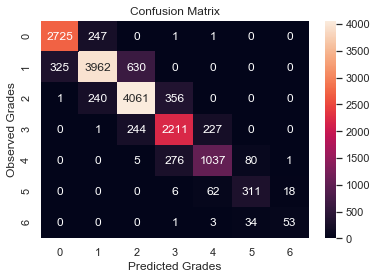

In [159]:
sn.set(font_scale=1.0)

ax = plt.subplot()

sn.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

In [160]:
ANNClassifier.score(X_test, y_test)

0.8388340440446288

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklear

''

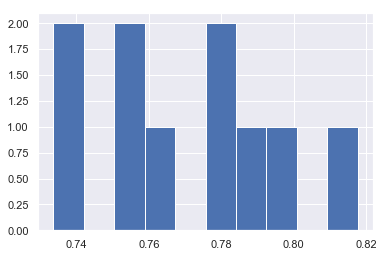

In [161]:
model_accuracies = []

for repetition in range(10):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
    
    scaler = StandardScaler()

    # Fit only to the training data
    scaler.fit(X_train)

    # Now apply the transformations to the data:
    X_train = scaler.transform(X_train)
    X_test = scaler.transform(X_test)
    
    ANNClassifier = MLPClassifier(random_state=1, max_iter=500)

    # Train the classifier on the training set
    ANNClassifier.fit(X_train, y_train)
    classifier_accuracy = ANNClassifier.score(X_test, y_test)
    model_accuracies.append(classifier_accuracy)    
    
plt.hist(model_accuracies)
;

In [162]:
print("Min: ", min(model_accuracies))
print("Max: ", max(model_accuracies))

Min:  0.7336448598130841
Max:  0.8177570093457944


When using KNN on this data set with the selected features, we achieve the best accuracy when k=8, when the accuracy is 94.26%.

### 5.3 Neuronal Networks ANN

[[ go back to the top ]](#Table-of-contents)

Neural networks, also known as artificial neural networks (ANNs), are a subset of machine learning and are at the heart of deep learning algorithms. Their name and structure are inspired by the human brain, mirroring the way that organic neurons flag to one another.
Artificial neural networks (ANNs) are comprised of a node layers, containing an input layer, one or more hidden layers, and an output layer. Each node, or artificial neuron, interfaces to another and has an related weight and limit. If the output of any individual node is above the specified threshold value, that node is activated, sending data to the next layer of the network. Otherwise, no information is passed along to the following layer of the network.

In [215]:
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report,confusion_matrix

credit_data_subset = credit_data.sample(frac=0.10)
X = credit_data_subset[credit_data_subset.columns.drop(['grade', 'issue_d', 'earliest_cr_line', 'last_credit_pull_d'])] 
y = credit_data_subset['grade']

In [220]:
# get a test dataset with 10% of the credit_data_subset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

scaler = StandardScaler()

# Fit only to the training data
scaler.fit(X_train)


# Now apply the transformations to the data:
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [221]:
# Create the classifier
ANNClassifier = MLPClassifier(random_state=1, max_iter=500, hidden_layer_sizes=(20,20,20))

# Train the classifier on the training set
ANNClassifier.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(20, 20, 20), max_iter=500, random_state=1)

In [222]:
predictions = ANNClassifier.predict(X_test)

confusion_matrix_ann = confusion_matrix(y_test,predictions)
print(confusion_matrix_ann)

[[2728  140    0    0    0    0    0]
 [ 131 4150  642    0    0    0    0]
 [   1  270 4039  473    0    0    0]
 [   1    1  149 2279  280    0    0]
 [   0    0    3  200 1081   32    0]
 [   0    0    0    8   51  328   36]
 [   0    0    0    1    5   14   76]]


In [223]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           1       0.95      0.95      0.95      2868
           2       0.91      0.84      0.88      4923
           3       0.84      0.84      0.84      4783
           4       0.77      0.84      0.80      2710
           5       0.76      0.82      0.79      1316
           6       0.88      0.78      0.82       423
           7       0.68      0.79      0.73        96

    accuracy                           0.86     17119
   macro avg       0.83      0.84      0.83     17119
weighted avg       0.86      0.86      0.86     17119



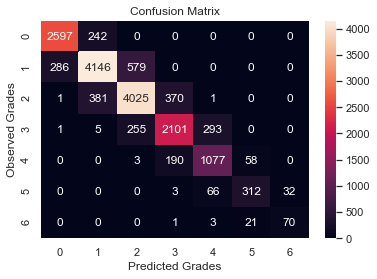

0.8369647759799054

In [174]:
sn.set(font_scale=1.0)

ax = plt.subplot()

sn.heatmap(confusion_matrix_ann, annot=True, ax=ax, fmt="g")

ax.set_xlabel('Predicted Grades');
ax.set_ylabel('Observed Grades');
ax.set_title('Confusion Matrix');
plt.show()

ANNClassifier.score(X_test, y_test)

Using the Neural Network algorithm we have achieved an accuracy of aproximately 84%.

In [ ]:
parameter_grid = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,)],
    'activation': ['tanh', 'relu'],
    'solver': ['sgd', 'adam'],
    'alpha': [0.0001, 0.05],
    'learning_rate': ['constant','adaptive'],
}

cross_validation = StratifiedKFold(n_splits=10, shuffle=True)

grid_search = GridSearchCV(ANNClassifier,
                           param_grid=parameter_grid,
                           cv=cross_validation)

grid_search.fit(X_train, y_train)

C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:585: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
C:\Anaconda\lib\site-packages\sklear

In [228]:
print('Best score: {}'.format(grid_search.best_score_))
print('Best parameters: {}'.format(grid_search.best_params_))

Best score: 0.8813252704472523
Best parameters: {'activation': 'tanh', 'hidden_layer_sizes': (3, 5, 8, 13, 21, 34), 'solver': 'adam', 'verbose': True}
